In [1]:
%pylab inline
from landlab import RasterModelGrid
from landlab.plot.imshow import imshow_grid_at_node
from landlab.components import PresFlowNetwork, MeltCreep
import numpy as np
from matplotlib import colors,  cm
import matplotlib.animation as animation
from landlab.components.conduit_networks.calcite import calcite_diss_palmer_transfer

from PIL import Image
from PIL import ImageDraw

def plot_links(grid, value_name, autoscale=True, 
               vmin=0., vmax=0., cmap_name='viridis', 
               magnitude= False, lw=5, 
               pixels_per_node=31, x_name='X', 
               y_name='Y', var_name='', use_PIL=True):#, logvalues=False ):
    if use_PIL:
        pixel_xscaling_factor = pixels_per_node/grid.dx
        pixel_yscaling_factor = pixels_per_node/grid.dy
        im = Image.new('RGBA', ( int(round(grid.number_of_cell_columns*pixels_per_node)), int(round(grid.number_of_cell_rows*pixels_per_node)) ), (255,255,255,255))
        draw = ImageDraw.Draw(im)

    link_head_x = grid.node_x[grid.node_at_link_head]
    link_head_y = grid.node_y[grid.node_at_link_head]
    link_tail_x = grid.node_x[grid.node_at_link_tail]
    link_tail_y = grid.node_y[grid.node_at_link_tail]       
    if magnitude:
        values = abs(grid.at_link[value_name])
    else:
        values = grid.at_link[value_name]
    #if logvalues:
    #    values = np.log10(abs(grid.at_link[value_name]))
    
    
    
    #Normalize color values
    if autoscale:
        cnorm = colors.Normalize()
        cnorm.autoscale(values)
    else:
        cnorm = colors.Normalize(vmin,vmax)
    scalarMap = cm.ScalarMappable(norm=cnorm, cmap = get_cmap(cmap_name))
    scalarMap.set_array(values)
    #set_cmap()
    if use_PIL:
        for i, value in enumerate(values):
            draw.line( ((link_head_x[i]*pixel_xscaling_factor,link_head_y[i]*pixel_yscaling_factor),(link_tail_x[i]*pixel_xscaling_factor,link_tail_y[i]*pixel_yscaling_factor)),fill=scalarMap.to_rgba(value,bytes=True),width=lw) 
        imshow(np.asarray(im), origin='lower', extent=(0,grid.number_of_cell_columns,0,grid.number_of_cell_rows))
    else:
        for i, value in enumerate(values):
            xs = [link_head_x[i],link_tail_x[i]]
            ys = [link_head_y[i],link_tail_y[i]]
            img = plot(xs,ys,lw=lw,color=scalarMap.to_rgba(value))    
    cb = colorbar(scalarMap)
    cb.ax.set_ylabel(var_name)
    xlabel(x_name)
    ylabel(y_name)


Populating the interactive namespace from numpy and matplotlib


### Test case 1 (parallel conduits, head gradient boundary)

In [2]:
mg = RasterModelGrid((5,10),100)
junc_elev = mg.add_zeros('node', 'junction__elevation')
R = mg.add_zeros('node', 'input__discharge')
h = mg.add_zeros('node', 'hydraulic__head')
Q = mg.add_zeros('link', 'conduit__discharge')
mg.add_zeros('node','storage')
mg.at_node['storage']=10.*np.ones(mg.number_of_nodes)

#mg.at_node['junction__elevation'] = -0.01*mg.node_x + 4.

w = mg.add_zeros('link','width')
mg.at_link['width']= 1.0*np.ones(mg.number_of_links)#.*np.random.rand(mg.number_of_active_links)

d_h = mg.add_zeros('link','hydraulic__diameter')
mg.at_link['hydraulic__diameter'] =  mg.at_link['width'].copy()

#mg.at_node['input__discharge'][12]=0.05

#Set up link elevation offsets
xc_min_head = mg.add_zeros('link', 'conduit_head__offset')
xc_min_tail = mg.add_zeros('link', 'conduit_tail__offset')
y_max = mg.add_zeros('link', 'maximum__depth')
mg.at_link['maximum__depth']= mg.at_link['width']#applicable for square conduits

#print(mg.at_link['maximum__depth'])

#set heads at edges
h[mg.nodes_at_top_edge] = 0.
h[mg.nodes_at_bottom_edge] = 0.
h[mg.nodes_at_left_edge] = 10.
h[mg.nodes_at_right_edge] = 0.


mg.set_closed_boundaries_at_grid_edges(False,True,False,True)
Q[mg.active_links] = 0.1#0.1*np.random.rand(mg.number_of_active_links)
n_core = mg.number_of_core_nodes
links = mg.links_at_node
print("Number of links = ", mg.number_of_links)
print("Number of nodes = ", mg.number_of_nodes)
print("Number of active links = ", mg.number_of_active_links)
print("Number of core nodes = ", mg.number_of_core_nodes)

pfn = PresFlowNetwork(mg)

for i in arange(300):
    print('Time iteration:', i)
    pfn.dyn_wave_solution(dt=5., outflow_bnd_type = 'normal')
    


Number of links =  85
Number of nodes =  50
Number of active links =  43
Number of core nodes =  24
Time iteration: 0
max change in h:  0.133319787859
max change in h:  0.0996264832639
max change in h:  0.0717336852711
max change in h:  0.0506098026819
max change in h:  0.0351741134157
max change in h:  0.0241490808613
max change in h:  0.016412973378
max change in h:  0.0110633456814
max change in h:  0.00740830316112
max change in h:  0.00495735009404
max change in h:  0.00336679880566
max change in h:  0.0023021320841
max change in h:  0.00159239844787
max change in h:  0.00109947218969
max change in h:  0.000757843380702
max change in h:  0.000521532044427
max change in h:  0.00035836611691
max change in h:  0.00024589622025
max change in h:  0.000168495483002
max change in h:  0.000115310190542
max change in h:  7.88172530739e-05
average dh= 0.069403173553   average abs(dQ)= 0.242247314262
Time iteration: 1
max change in h:  0.363944052271
max change in h:  0.174059872104
max chan

Entering normal flow calc.
slope= [ 0.]   Q= [-0.00010728]
max change in h:  0.0791221138849
Entering normal flow calc.
slope= [ 0.]   Q= [-0.00011054]
max change in h:  0.0354858768004
Entering normal flow calc.
slope= [ 0.]   Q= [-0.00011194]
max change in h:  0.0195284715266
Entering normal flow calc.
slope= [ 0.]   Q= [-0.00011259]
max change in h:  0.010599583065
Entering normal flow calc.
slope= [ 0.]   Q= [-0.00011294]
max change in h:  0.00560953563045
Entering normal flow calc.
slope= [ 0.]   Q= [-0.00011318]
max change in h:  0.00289007872622
Entering normal flow calc.
slope= [ 0.]   Q= [-0.00011335]
max change in h:  0.00144889368551
Entering normal flow calc.
slope= [ 0.]   Q= [-0.00011348]
max change in h:  0.00070686165717
Entering normal flow calc.
slope= [ 0.]   Q= [-0.00011358]
max change in h:  0.000335665179306
Entering normal flow calc.
slope= [ 0.]   Q= [-0.00011366]
max change in h:  0.000170036295306
Entering normal flow calc.
slope= [ 0.]   Q= [-0.00011372]
max 

max change in h:  0.00143854423493
Entering normal flow calc.
slope= [ 0.]   Q= [-0.16039391]
Entering normal flow calc.
slope= [ 0.]   Q= [-0.1462213]
Entering normal flow calc.
slope= [ 0.]   Q= [-0.1329861]
max change in h:  0.000538984609589
Entering normal flow calc.
slope= [ 0.]   Q= [-0.16108697]
Entering normal flow calc.
slope= [ 0.]   Q= [-0.14695184]
Entering normal flow calc.
slope= [ 0.]   Q= [-0.1337626]
max change in h:  0.00022409810217
Entering normal flow calc.
slope= [ 0.]   Q= [-0.16141779]
Entering normal flow calc.
slope= [ 0.]   Q= [-0.14730066]
Entering normal flow calc.
slope= [ 0.]   Q= [-0.1341365]
max change in h:  0.000110320221568
Entering normal flow calc.
slope= [ 0.]   Q= [-0.16157034]
Entering normal flow calc.
slope= [ 0.]   Q= [-0.1474614]
Entering normal flow calc.
slope= [ 0.]   Q= [-0.13430969]
max change in h:  5.44912977101e-05
average dh= 0.12632660117   average abs(dQ)= 0.0268860777782
Time iteration: 21
Entering normal flow calc.
slope= [ 0.]

max change in h:  0.00879771241539
max change in h:  0.00433762568481
max change in h:  0.00213354594158
max change in h:  0.00104736994558
max change in h:  0.000513320664987
max change in h:  0.000251238989548
max change in h:  0.000122829035001
max change in h:  5.99970916602e-05
average dh= 0.0246197864862   average abs(dQ)= 0.00380327351225
Time iteration: 50
max change in h:  0.00843188185719
max change in h:  0.00415383130724
max change in h:  0.00204097577324
max change in h:  0.00100069096576
max change in h:  0.000489791538005
max change in h:  0.000239402316017
max change in h:  0.000116895081212
max change in h:  5.71614633804e-05
average dh= 0.0235156516487   average abs(dQ)= 0.0035907299283
Time iteration: 51
max change in h:  0.00806186762812
max change in h:  0.003968294924
max change in h:  0.0019480678853
max change in h:  0.000954268859726
max change in h:  0.00046666710436
max change in h:  0.000227927374942
max change in h:  0.000111593259888
max change in h:  5.47

max change in h:  0.000375117720602
max change in h:  0.000184246332932
max change in h:  9.03811512307e-05
average dh= 0.00442281928771   average abs(dQ)= 0.000658919286747
Time iteration: 88
max change in h:  0.00148190204796
max change in h:  0.000730292632777
max change in h:  0.00035912583468
max change in h:  0.000176305276259
max change in h:  8.64384351882e-05
average dh= 0.00423004961295   average abs(dQ)= 0.000628624418276
Time iteration: 89
max change in h:  0.00141855099638
max change in h:  0.000698845019228
max change in h:  0.000343530857192
max change in h:  0.000168579685809
max change in h:  8.26159177247e-05
average dh= 0.00404554968718   average abs(dQ)= 0.000598612661461
Time iteration: 90
max change in h:  0.00135650284453
max change in h:  0.000668091402893
max change in h:  0.000328324858778
max change in h:  0.000161078262495
max change in h:  7.89235340735e-05
average dh= 0.00386901818859   average abs(dQ)= 0.00057283749376
Time iteration: 91
max change in h: 

max change in h:  0.000162395320768
max change in h:  7.99476284481e-05
average dh= 0.000468405086182   average abs(dQ)= 7.18828396287e-05
Time iteration: 140
max change in h:  0.000156142830202
max change in h:  7.69287202003e-05
average dh= 0.000450089669137   average abs(dQ)= 6.91418641347e-05
Time iteration: 141
max change in h:  0.000150238150682
max change in h:  7.40030522408e-05
average dh= 0.000432467880944   average abs(dQ)= 6.63647614541e-05
Time iteration: 142
max change in h:  0.000144488701797
max change in h:  7.11527345025e-05
average dh= 0.000415521756624   average abs(dQ)= 6.35966083149e-05
Time iteration: 143
max change in h:  0.000138867063564
max change in h:  6.83676751887e-05
average dh= 0.000399230637752   average abs(dQ)= 6.10202341756e-05
Time iteration: 144
max change in h:  0.000133364870143
max change in h:  6.5646644547e-05
average dh= 0.000383572525576   average abs(dQ)= 5.88677054785e-05
Time iteration: 145
max change in h:  0.000127992395335
max change 

average dh= 1.13400650791e-05   average abs(dQ)= 2.13308395645e-06
Time iteration: 246
max change in h:  3.86586678047e-06
average dh= 1.09552802647e-05   average abs(dQ)= 2.06955964754e-06
Time iteration: 247
max change in h:  3.86233742411e-06
average dh= 1.05835517558e-05   average abs(dQ)= 1.95397649073e-06
Time iteration: 248
max change in h:  3.83302851592e-06
average dh= 1.02244365332e-05   average abs(dQ)= 1.79465594957e-06
Time iteration: 249
max change in h:  3.76456288009e-06
average dh= 9.87750660956e-06   average abs(dQ)= 1.60632983238e-06
Time iteration: 250
max change in h:  3.64971639133e-06
average dh= 9.54234852025e-06   average abs(dQ)= 1.52836106749e-06
Time iteration: 251
max change in h:  3.48839635578e-06
average dh= 9.21856282986e-06   average abs(dQ)= 1.61634403044e-06
Time iteration: 252
max change in h:  3.28761309287e-06
average dh= 8.9057636564e-06   average abs(dQ)= 1.67771208117e-06
Time iteration: 253
max change in h:  3.06045179599e-06
average dh= 8.603

Node net fluxes =  [  6.94381402e-07   1.30504171e-06   1.75834250e-06   1.99960272e-06
   1.99969720e-06   1.75858174e-06   1.30531376e-06   6.94558973e-07
   1.66716546e-06   3.13324074e-06   4.22139267e-06   4.80037504e-06
   4.80035847e-06   4.22135069e-06   3.13319301e-06   1.66713430e-06
   2.63994659e-06   4.96143404e-06   6.68443458e-06   7.60113726e-06
   7.60100886e-06   6.68410945e-06   4.96106431e-06   2.63970526e-06]
Node head =  [ 10.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
  10.           8.9999819    7.99996599   6.99995418   5.9999479
   4.9999479    3.99995418   2.99996599   1.9999819    1.
  10.           8.99998185   7.99996588   6.99995404   5.99994773
   4.99994773   3.99995404   2.99996588   1.99998185   1.
  10.           8.99998179   7.99996578   6.99995389   5.99994757
   4.99994757   3.99995389   2.99996578   1.99998179   1.
  10.           0.           0.           0.           0.
   0.   

Text(0, 0.5, 'D_H')

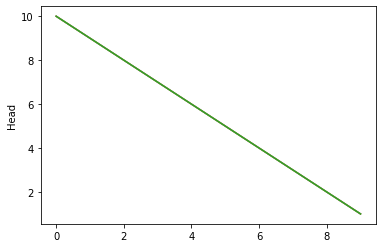

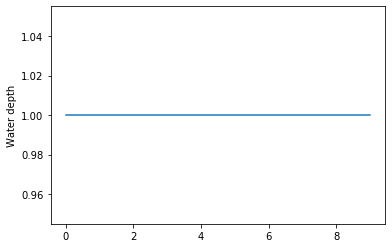

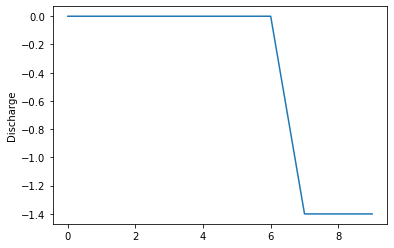

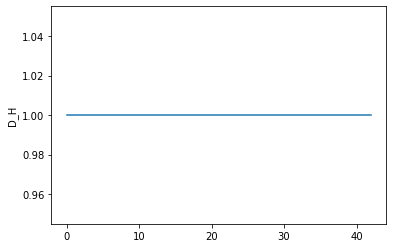

In [3]:
print("Node net fluxes = ",mg.calc_net_flux_at_node(Q)[mg.core_nodes]/mg.dx - mg.at_node['input__discharge'][mg.core_nodes])
print("Node head = ",h)

figure()
plot(h[10:20])
plot(h[20:30])
plot(h[30:40])
ylabel('Head')

print('Discharge=',Q[mg.active_links])
#Discharge from DW equation
L = max(mg.node_x)
deltaH = max(h[mg.nodes_at_left_edge]) - min(h[mg.nodes_at_right_edge])
f=0.1
g=9.8
D_H = 1. 
print('DW discharge = ', D_H**2.*sqrt(2*g*D_H*deltaH/f/L))


figure()
water_depth = mg.at_node['hydraulic__head'][10:20] - mg.at_node['junction__elevation'][10:20]
water_depth[water_depth>1.] = 1.
plot(water_depth)
ylabel('Water depth')


figure()
plot(Q[mg.active_links][10:20])
ylabel('Discharge')

figure()
plot(mg.at_link['hydraulic__diameter'][mg.active_links])
ylabel('D_H')



Normal flow boundary fails in this case, as there is zero slope. Outfall (or fixed head) might be more appropriate here.

### Test Case 2 (single conduit, recharge boundary)

In [6]:
mg = RasterModelGrid((3,10),100)
junc_elev = mg.add_zeros('node', 'junction__elevation')
R = mg.add_zeros('node', 'input__discharge')
h = mg.add_zeros('node', 'hydraulic__head')
Q = mg.add_zeros('link', 'conduit__discharge')
mg.add_zeros('node','storage')
mg.at_node['storage']=10.*np.ones(mg.number_of_nodes)

#mg.at_node['junction__elevation'] = -0.01*mg.node_x + 4.

w = mg.add_zeros('link','width')
mg.at_link['width']= 1.0*np.ones(mg.number_of_links)#.*np.random.rand(mg.number_of_active_links)

d_h = mg.add_zeros('link','hydraulic__diameter')
mg.at_link['hydraulic__diameter'] = mg.at_link['width'].copy()

mg.at_node['input__discharge'][11]=1.475

#Set up link elevation offsets
xc_min_head = mg.add_zeros('link', 'conduit_head__offset')
xc_min_tail = mg.add_zeros('link', 'conduit_tail__offset')
y_max = mg.add_zeros('link', 'maximum__depth')
mg.at_link['maximum__depth']= mg.at_link['width']#applicable for square conduits

#print(mg.at_link['maximum__depth'])

#set heads at edges
h[mg.nodes_at_top_edge] = 0.
h[mg.nodes_at_bottom_edge] = 0.
h[mg.nodes_at_left_edge] = 10.
h[mg.nodes_at_right_edge] = 0.


mg.set_closed_boundaries_at_grid_edges(False,True,True,True)
Q[mg.active_links] = 0.1#0.1*np.random.rand(mg.number_of_active_links)
n_core = mg.number_of_core_nodes
links = mg.links_at_node
print("Number of links = ", mg.number_of_links)
print("Number of nodes = ", mg.number_of_nodes)
print("Number of active links = ", mg.number_of_active_links)
print("Number of core nodes = ", mg.number_of_core_nodes)

pfn = PresFlowNetwork(mg)

for i in arange(500):
    print('Time iteration:', i)
    pfn.dyn_wave_solution(dt=10.,outflow_bnd_type='normal')
    


Number of links =  47
Number of nodes =  30
Number of active links =  8
Number of core nodes =  8
Time iteration: 0
max change in h:  0.358597711019
max change in h:  0.133752246008
max change in h:  0.0536795122073
max change in h:  0.0406897141127
max change in h:  0.027090033916
max change in h:  0.0165157250412
max change in h:  0.00940989482334
max change in h:  0.00507617225229
max change in h:  0.00261831354582
max change in h:  0.00130172897964
max change in h:  0.000628061450891
max change in h:  0.000295879970812
max change in h:  0.000136883760508
max change in h:  6.25422011264e-05
average dh= 0.190625196165   average abs(dQ)= 0.147033469017
Time iteration: 1
max change in h:  0.188210884379
max change in h:  0.0992429994833
max change in h:  0.0507376956525
max change in h:  0.022763495259
max change in h:  0.0172655026783
max change in h:  0.0116460472543
max change in h:  0.00710660707314
max change in h:  0.00397075925106
max change in h:  0.00204660411455
max change in

max change in h:  0.00947218661556
max change in h:  0.00466982283636
max change in h:  0.00230179951497
max change in h:  0.00113492271696
max change in h:  0.000559930588668
max change in h:  0.000276474580097
max change in h:  0.000136651432214
max change in h:  6.76309899506e-05
average dh= 0.130337643239   average abs(dQ)= 0.0224960204728
Time iteration: 14
max change in h:  0.0376415493099
max change in h:  0.0186031788595
max change in h:  0.00918350387336
max change in h:  0.00453230868571
max change in h:  0.00223753276106
max change in h:  0.00110538267064
max change in h:  0.000546584165454
max change in h:  0.000270584685061
max change in h:  0.000134137783961
max change in h:  6.65969542721e-05
average dh= 0.118559040713   average abs(dQ)= 0.021175234264
Time iteration: 15
max change in h:  0.0365209176732
max change in h:  0.018067683706
max change in h:  0.00893210540631
max change in h:  0.00441628201378
max change in h:  0.0021848856289
max change in h:  0.001081929889

max change in h:  0.000165542071208
max change in h:  8.16668507415e-05
average dh= 0.0302494947012   average abs(dQ)= 0.00447604721141
Time iteration: 54
max change in h:  0.0111009113256
max change in h:  0.00549342620022
max change in h:  0.00271485184384
max change in h:  0.00134064357064
max change in h:  0.000661740916946
max change in h:  0.000326551972021
max change in h:  0.000161121392773
max change in h:  7.94909232056e-05
average dh= 0.0294502628583   average abs(dQ)= 0.00433631897956
Time iteration: 55
max change in h:  0.0108021611831
max change in h:  0.00534585403942
max change in h:  0.00264206861155
max change in h:  0.0013047779051
max change in h:  0.000644075870408
max change in h:  0.00031785369084
max change in h:  0.000156838993805
max change in h:  7.73827574196e-05
average dh= 0.0286755075332   average abs(dQ)= 0.00420219463268
Time iteration: 56
max change in h:  0.0105128989021
max change in h:  0.00520295188161
max change in h:  0.00257157954446
max change 

max change in h:  0.00609050340303
max change in h:  0.00301629232065
max change in h:  0.00149193668491
max change in h:  0.00073741335223
max change in h:  0.000364323844133
max change in h:  0.000179952138588
max change in h:  8.88717540732e-05
average dh= 0.0163165341709   average abs(dQ)= 0.00222792252387
Time iteration: 78
max change in h:  0.00593952937723
max change in h:  0.00294158615366
max change in h:  0.00145501984128
max change in h:  0.000719184722046
max change in h:  0.000355327030761
max change in h:  0.000175512872204
max change in h:  8.66816301972e-05
average dh= 0.0159163908024   average abs(dQ)= 0.0021685017355
Time iteration: 79
max change in h:  0.00579263531249
max change in h:  0.00286889567356
max change in h:  0.00141909726886
max change in h:  0.000701446090568
max change in h:  0.000346571576264
max change in h:  0.000171192457744
max change in h:  8.45500227165e-05
average dh= 0.0155268315211   average abs(dQ)= 0.00211086080342
Time iteration: 80
max ch

max change in h:  9.76579175358e-05
average dh= 0.00887907682871   average abs(dQ)= 0.00116391004854
Time iteration: 103
max change in h:  0.00322013002014
max change in h:  0.00159536951671
max change in h:  0.000789453501305
max change in h:  0.000390378806353
max change in h:  0.000192959940653
max change in h:  9.53549758709e-05
average dh= 0.00867046382269   average abs(dQ)= 0.00113771439106
Time iteration: 104
max change in h:  0.00314403019846
max change in h:  0.00155767837625
max change in h:  0.000770809802221
max change in h:  0.000381163768653
max change in h:  0.000188407215655
max change in h:  9.31062603922e-05
average dh= 0.00846664631337   average abs(dQ)= 0.00111077888308
Time iteration: 105
max change in h:  0.00306976618186
max change in h:  0.00152089808611
max change in h:  0.000752616905926
max change in h:  0.000372171525196
max change in h:  0.000183964508599
max change in h:  9.09118469785e-05
average dh= 0.00826768378746   average abs(dQ)= 0.00108395365036
Ti

max change in h:  0.0016608501054
max change in h:  0.000823005912418
max change in h:  0.000407346214477
max change in h:  0.000201476584085
max change in h:  9.9611537383e-05
average dh= 0.00448409198507   average abs(dQ)= 0.000576197112758
Time iteration: 132
max change in h:  0.00162290962027
max change in h:  0.000804199262582
max change in h:  0.000398037170957
max change in h:  0.000196872542375
max change in h:  9.73355848934e-05
average dh= 0.00438195071455   average abs(dQ)= 0.000565157114578
Time iteration: 133
max change in h:  0.00158574743812
max change in h:  0.000785783996408
max change in h:  0.000388923436013
max change in h:  0.00019236553417
max change in h:  9.51077173834e-05
average dh= 0.00428187784638   average abs(dQ)= 0.000552955305675
Time iteration: 134
max change in h:  0.00154941090631
max change in h:  0.000767780037524
max change in h:  0.000380013836921
max change in h:  0.000187959622801
max change in h:  9.29298549526e-05
average dh= 0.00418400866506 

max change in h:  0.00019488029427
max change in h:  9.63999865871e-05
average dh= 0.0021486069712   average abs(dQ)= 0.00027655533419
Time iteration: 164
max change in h:  0.000776775739514
max change in h:  0.000384939313376
max change in h:  0.000190542670047
max change in h:  9.42542521418e-05
average dh= 0.00210087602619   average abs(dQ)= 0.000271280220994
Time iteration: 165
max change in h:  0.000759456917542
max change in h:  0.000376356044132
max change in h:  0.000186293996425
max change in h:  9.21526945881e-05
average dh= 0.00205409582955   average abs(dQ)= 0.000265563657971
Time iteration: 166
max change in h:  0.000742511073078
max change in h:  0.000367958494131
max change in h:  0.000182137494459
max change in h:  9.00967938104e-05
average dh= 0.00200831745394   average abs(dQ)= 0.0002597451182
Time iteration: 167
max change in h:  0.000725940176068
max change in h:  0.000359747089542
max change in h:  0.00017807321705
max change in h:  8.8086530571e-05
average dh= 0.0

max change in h:  0.00031842573059
max change in h:  0.000157795027928
max change in h:  7.81086887844e-05
average dh= 0.000862423846231   average abs(dQ)= 0.000113186496779
Time iteration: 205
max change in h:  0.000311575616118
max change in h:  0.00015440059984
max change in h:  7.64285140971e-05
average dh= 0.000843879731668   average abs(dQ)= 0.000110742545803
Time iteration: 206
max change in h:  0.000304873506289
max change in h:  0.000151079507152
max change in h:  7.4784636066e-05
average dh= 0.000825735912044   average abs(dQ)= 0.000108351709874
Time iteration: 207
max change in h:  0.000298316179284
max change in h:  0.000147830153505
max change in h:  7.31762646673e-05
average dh= 0.000807983689926   average abs(dQ)= 0.000106012863253
Time iteration: 208
max change in h:  0.00029190048248
max change in h:  0.000144650976939
max change in h:  7.16026269139e-05
average dh= 0.000790614553596   average abs(dQ)= 0.000103724877535
Time iteration: 209
max change in h:  0.000285623

max change in h:  9.93091507766e-05
average dh= 0.00027001792475   average abs(dQ)= 3.36664355789e-05
Time iteration: 261
max change in h:  9.77049122817e-05
average dh= 0.000265683271425   average abs(dQ)= 3.47004286081e-05
Time iteration: 262
max change in h:  9.60683669433e-05
average dh= 0.000261246150421   average abs(dQ)= 3.48483870224e-05
Time iteration: 263
max change in h:  9.44323507248e-05
average dh= 0.000256803625858   average abs(dQ)= 3.45919273175e-05
Time iteration: 264
max change in h:  9.28117884591e-05
average dh= 0.000252399907235   average abs(dQ)= 3.41538985749e-05
Time iteration: 265
max change in h:  9.12133198447e-05
average dh= 0.000248054746399   average abs(dQ)= 3.36373609992e-05
Time iteration: 266
max change in h:  8.96397559309e-05
average dh= 0.000243776584377   average abs(dQ)= 3.30899239424e-05
Time iteration: 267
max change in h:  8.8092141791e-05
average dh= 0.000239568637812   average abs(dQ)= 3.25335299271e-05
Time iteration: 268
max change in h:  

max change in h:  2.30396775915e-05
average dh= 6.26629037295e-05   average abs(dQ)= 8.50591664175e-06
Time iteration: 345
max change in h:  2.2641996182e-05
average dh= 6.15813323463e-05   average abs(dQ)= 8.3590591908e-06
Time iteration: 346
max change in h:  2.22511812442e-05
average dh= 6.05184344497e-05   average abs(dQ)= 8.21473876186e-06
Time iteration: 347
max change in h:  2.18671141461e-05
average dh= 5.94738874547e-05   average abs(dQ)= 8.07291147634e-06
Time iteration: 348
max change in h:  2.14896783071e-05
average dh= 5.84473743548e-05   average abs(dQ)= 7.9335342158e-06
Time iteration: 349
max change in h:  2.1118759161e-05
average dh= 5.74385836262e-05   average abs(dQ)= 7.7965646097e-06
Time iteration: 350
max change in h:  2.07542441224e-05
average dh= 5.64472091323e-05   average abs(dQ)= 7.66196102206e-06
Time iteration: 351
max change in h:  2.03960225562e-05
average dh= 5.54729500302e-05   average abs(dQ)= 7.52968253756e-06
Time iteration: 352
max change in h:  2.0

max change in h:  5.43191700331e-06
average dh= 1.47740069613e-05   average abs(dQ)= 2.00496899372e-06
Time iteration: 428
max change in h:  5.33818163184e-06
average dh= 1.45190626479e-05   average abs(dQ)= 1.97036825411e-06
Time iteration: 429
max change in h:  5.2460639175e-06
average dh= 1.42685180232e-05   average abs(dQ)= 1.93636471887e-06
Time iteration: 430
max change in h:  5.15553594305e-06
average dh= 1.40222971497e-05   average abs(dQ)= 1.90294807717e-06
Time iteration: 431
max change in h:  5.066570262e-06
average dh= 1.37803254006e-05   average abs(dQ)= 1.87010819694e-06
Time iteration: 432
max change in h:  4.97913991637e-06
average dh= 1.35425294377e-05   average abs(dQ)= 1.83783512067e-06
Time iteration: 433
max change in h:  4.89321840291e-06
average dh= 1.33088371888e-05   average abs(dQ)= 1.80611906306e-06
Time iteration: 434
max change in h:  4.80877967846e-06
average dh= 1.30791778261e-05   average abs(dQ)= 1.77495040779e-06
Time iteration: 435
max change in h:  4

max change in h:  1.57843383874e-06
average dh= 4.29312937012e-06   average abs(dQ)= 5.82587527664e-07
Time iteration: 499
max change in h:  1.55119723289e-06
average dh= 4.21904959775e-06   average abs(dQ)= 5.72534525539e-07


Node net fluxes =  [  6.17436492e-06   5.96410077e-06   5.55073468e-06   4.94834510e-06
   4.17744707e-06   3.26429340e-06   2.23998060e-06   1.13939001e-06]
Node head =  [ 10.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
  10.           9.87078356   8.76191139   7.65304798   6.54419272
   5.43534474   4.32650289   3.21766584   2.10883208   1.
  10.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]
Discharge= [-1.47499383 -1.47498786 -1.47498231 -1.47497736 -1.47497319 -1.47496992
 -1.47496768 -1.47496654]
DW discharge =  1.47572957475


Text(0, 0.5, 'D_H')

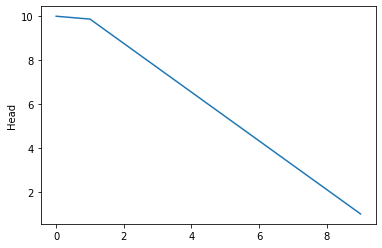

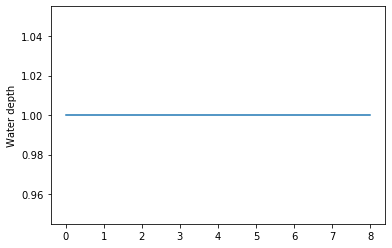

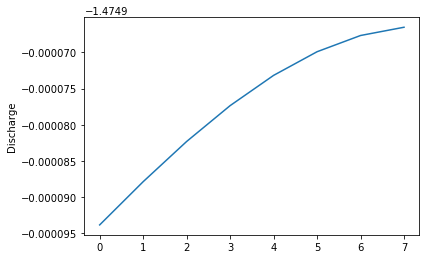

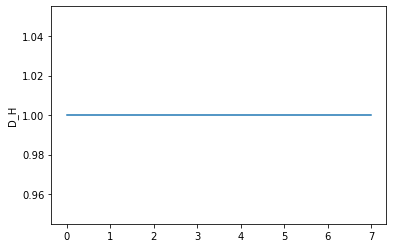

In [7]:
print("Node net fluxes = ",mg.calc_net_flux_at_node(Q)[mg.core_nodes]/mg.dx + mg.at_node['input__discharge'][mg.core_nodes])
print("Node head = ",h)

figure()
plot(h[10:20])
#plot(h[20:30])
#plot(h[30:40])
ylabel('Head')

print('Discharge=',Q[mg.active_links])
#Discharge from DW equation
L = max(mg.node_x)
deltaH = max(h[mg.nodes_at_left_edge]) - min(h[mg.nodes_at_right_edge])
f=0.1
g=9.8
D_H = 1. 
print('DW discharge = ', D_H**2.*sqrt(2*g*D_H*deltaH/f/L))

figure()
water_depth = mg.at_node['hydraulic__head'][11:20] - mg.at_node['junction__elevation'][11:20]
water_depth[water_depth>1.] = 1.
plot(water_depth)
ylabel('Water depth')


figure()
plot(Q[mg.active_links])
ylabel('Discharge')

figure()
plot(mg.at_link['hydraulic__diameter'][mg.active_links])
ylabel('D_H')




### Test Case 3 (Single conduit, Recharge boundary, slightly tilted domain)

In [18]:
### Note need to add downstream boundary condition for critical flow depth (free outfall)

#For rectangle, Y_crit = (Q^2/(g w^2))^(1/3)



mg = RasterModelGrid((3,10),100)
junc_elev = mg.add_zeros('node', 'junction__elevation')
R = mg.add_zeros('node', 'input__discharge')
h = mg.add_zeros('node', 'hydraulic__head')
Q = mg.add_zeros('link', 'conduit__discharge')
mg.add_zeros('node','storage')
mg.at_node['storage']=10.*np.ones(mg.number_of_nodes)

mg.at_node['junction__elevation'] = -0.0001*mg.node_x + 0.09
#mg.at_node['hydraulic__head'] = mg.at_node['junction__elevation'] + 1
#h = mg.at_node['hydraulic__head']


w = mg.add_zeros('link','width')
mg.at_link['width']= 1.0*np.ones(mg.number_of_links)#.*np.random.rand(mg.number_of_active_links)

d_h = mg.add_zeros('link','hydraulic__diameter')
mg.at_link['hydraulic__diameter'] = mg.at_link['width'].copy()

mg.at_node['input__discharge'][11]=0.05

#Set up link elevation offsets
xc_min_head = mg.add_zeros('link', 'conduit_head__offset')
xc_min_tail = mg.add_zeros('link', 'conduit_tail__offset')
y_max = mg.add_zeros('link', 'maximum__depth')
mg.at_link['maximum__depth']= mg.at_link['width']#applicable for square conduits

#print(mg.at_link['maximum__depth'])

#set heads at edges
h[mg.nodes_at_top_edge] = 0.
h[mg.nodes_at_bottom_edge] = 0.
h[mg.nodes_at_left_edge] = 10.
h[mg.nodes_at_right_edge] = 0.0


mg.set_closed_boundaries_at_grid_edges(False,True,True,True)
Q[mg.active_links] = 0.#0.1*np.random.rand(mg.number_of_active_links)
n_core = mg.number_of_core_nodes
links = mg.links_at_node
print("Number of links = ", mg.number_of_links)
print("Number of nodes = ", mg.number_of_nodes)
print("Number of active links = ", mg.number_of_active_links)
print("Number of core nodes = ", mg.number_of_core_nodes)

pfn = PresFlowNetwork(mg)

for i in arange(500):
    print('Time iteration:', i)
    pfn.dyn_wave_solution(dt=10., outflow_bnd_type='outfall')


Number of links =  47
Number of nodes =  30
Number of active links =  8
Number of core nodes =  8
Time iteration: 0
max change in h:  0.0124999969344
max change in h:  0.006249999997
max change in h:  0.00312500075943
max change in h:  0.00156250075236
max change in h:  0.000781250547912
max change in h:  0.000390625337293
max change in h:  0.000195312680311
max change in h:  9.76563403574e-05
average dh= 0.00625   average abs(dQ)= 7.75505687235e-11
Time iteration: 1
max change in h:  0.0124999998054
max change in h:  0.00621032675835
max change in h:  0.00307053250089
max change in h:  0.00150837404611
max change in h:  0.000737388407855
max change in h:  0.00035911204035
max change in h:  0.000174386569677
max change in h:  8.45062043765e-05
average dh= 0.00625   average abs(dQ)= 6.90603337372e-05
Time iteration: 2
max change in h:  0.0120929331906
max change in h:  0.00584354591622
max change in h:  0.00278803415747
max change in h:  0.00131544556182
max change in h:  0.000614821529

max change in h:  0.00833924535647
max change in h:  0.00421913602139
max change in h:  0.00210397330836
max change in h:  0.00103466825634
max change in h:  0.00050248666834
max change in h:  0.000241446386648
max change in h:  0.000115022133907
max change in h:  5.44394267281e-05
average dh= 0.00625   average abs(dQ)= 0.00124719082461
Time iteration: 26
max change in h:  0.00864432725277
max change in h:  0.00415785893334
max change in h:  0.0019526346963
max change in h:  0.00089865410025
max change in h:  0.000407097493974
max change in h:  0.000182437932728
max change in h:  8.1326693202e-05
average dh= 0.00625   average abs(dQ)= 0.00115943114002
Time iteration: 27
max change in h:  0.00793173731529
max change in h:  0.00364624706965
max change in h:  0.00162158930523
max change in h:  0.000701338672144
max change in h:  0.000320143411528
max change in h:  0.000177882974928
max change in h:  9.6657076099e-05
average dh= 0.00625   average abs(dQ)= 0.00104649509072
Time iteration: 2

max change in h:  0.000766550713529
max change in h:  0.00036057339013
max change in h:  0.000164676926923
max change in h:  7.33849502166e-05
average dh= 0.0016877997342   average abs(dQ)= 0.000350793833469
Time iteration: 52
max change in h:  0.000670205223989
max change in h:  0.000306880671142
max change in h:  0.000136882051188
max change in h:  6.38431675665e-05
average dh= 0.00159730127326   average abs(dQ)= 0.000338157495578
Time iteration: 53
max change in h:  0.000532869971575
max change in h:  0.000257465649885
max change in h:  0.000123149918954
max change in h:  5.79587739733e-05
average dh= 0.00151066605479   average abs(dQ)= 0.000327983465644
Time iteration: 54
max change in h:  0.000499062867854
max change in h:  0.000236707106293
max change in h:  0.000110151898549
max change in h:  5.05377212244e-05
average dh= 0.0014231988163   average abs(dQ)= 0.000317725914796
Time iteration: 55
max change in h:  0.00043769347424
max change in h:  0.000205021595477
max change in h:

max change in h:  1.45171708991e-05
average dh= 5.07209612873e-05   average abs(dQ)= 1.48154763113e-05
Time iteration: 118
max change in h:  1.37444849174e-05
average dh= 4.82053846886e-05   average abs(dQ)= 1.40844096456e-05
Time iteration: 119
max change in h:  1.29957279215e-05
average dh= 4.58138789412e-05   average abs(dQ)= 1.33907760181e-05
Time iteration: 120
max change in h:  1.2293014732e-05
average dh= 4.35367456721e-05   average abs(dQ)= 1.27310651615e-05
Time iteration: 121
max change in h:  1.16542738723e-05
average dh= 4.13667662893e-05   average abs(dQ)= 1.21024216439e-05
Time iteration: 122
max change in h:  1.10656426594e-05
average dh= 3.92991986076e-05   average abs(dQ)= 1.15028301072e-05
Time iteration: 123
max change in h:  1.05314897338e-05
average dh= 3.7331078903e-05   average abs(dQ)= 1.09310427217e-05
Time iteration: 124
max change in h:  1.00312237893e-05
average dh= 3.54601899154e-05   average abs(dQ)= 1.03863189073e-05
Time iteration: 125
max change in h:  

max change in h:  1.85882505832e-07
average dh= 6.58106333885e-07   average abs(dQ)= 1.93185793904e-07
Time iteration: 203
max change in h:  1.76559683873e-07
average dh= 6.2529962632e-07   average abs(dQ)= 1.83558261293e-07
Time iteration: 204
max change in h:  1.67756993241e-07
average dh= 5.94122280932e-07   average abs(dQ)= 1.74410140807e-07
Time iteration: 205
max change in h:  1.59441632008e-07
average dh= 5.64496197251e-07   average abs(dQ)= 1.65716617975e-07
Time iteration: 206
max change in h:  1.51565697992e-07
average dh= 5.36347814956e-07   average abs(dQ)= 1.57454839847e-07
Time iteration: 207
max change in h:  1.44077633157e-07
average dh= 5.09606461126e-07   average abs(dQ)= 1.49603906632e-07
Time iteration: 208
max change in h:  1.36934054984e-07
average dh= 4.84203240415e-07   average abs(dQ)= 1.42144442317e-07
Time iteration: 209
max change in h:  1.30107537855e-07
average dh= 4.60070730617e-07   average abs(dQ)= 1.35057954464e-07
Time iteration: 210
max change in h: 

max change in h:  2.4084928496e-09
average dh= 8.523503184e-09   average abs(dQ)= 2.50222001452e-09
Time iteration: 288
max change in h:  2.28855834283e-09
average dh= 8.09858634956e-09   average abs(dQ)= 2.37750398622e-09
Time iteration: 289
max change in h:  2.17460777163e-09
average dh= 7.69485630563e-09   average abs(dQ)= 2.25900226129e-09
Time iteration: 290
max change in h:  2.06629330313e-09
average dh= 7.31126077532e-09   average abs(dQ)= 2.14639667238e-09
Time iteration: 291
max change in h:  1.96330923741e-09
average dh= 6.94679627768e-09   average abs(dQ)= 2.03939126697e-09
Time iteration: 292
max change in h:  1.86539406144e-09
average dh= 6.60050617237e-09   average abs(dQ)= 1.93771158234e-09
Time iteration: 293
max change in h:  1.77232101217e-09
average dh= 6.27147988975e-09   average abs(dQ)= 1.84110055673e-09
Time iteration: 294
max change in h:  1.6838834771e-09
average dh= 5.95885253266e-09   average abs(dQ)= 1.74931316828e-09
Time iteration: 295
max change in h:  1.

max change in h:  3.63666319281e-11
average dh= 1.28695099594e-10   average abs(dQ)= 3.77808600377e-11
Time iteration: 370
max change in h:  3.4554414885e-11
average dh= 1.22279532801e-10   average abs(dQ)= 3.5897344125e-11
Time iteration: 371
max change in h:  3.2832903063e-11
average dh= 1.16183777408e-10   average abs(dQ)= 3.41078302754e-11
Time iteration: 372
max change in h:  3.11971559697e-11
average dh= 1.1039192534e-10   average abs(dQ)= 3.24076373376e-11
Time iteration: 373
max change in h:  2.96423441348e-11
average dh= 1.04888843375e-10   average abs(dQ)= 3.07922532958e-11
Time iteration: 374
max change in h:  2.81644152444e-11
average dh= 9.96601311719e-11   average abs(dQ)= 2.92573786378e-11
Time iteration: 375
max change in h:  2.67597055625e-11
average dh= 9.46920885973e-11   average abs(dQ)= 2.77989220185e-11
Time iteration: 376
max change in h:  2.54249954423e-11
average dh= 8.99716967075e-11   average abs(dQ)= 2.6413076587e-11
Time iteration: 377
max change in h:  2.4

max change in h:  5.21749310423e-13
average dh= 1.84627845998e-12   average abs(dQ)= 5.42016084792e-13
Time iteration: 453
max change in h:  4.95714580495e-13
average dh= 1.75424102328e-12   average abs(dQ)= 5.14994297207e-13
Time iteration: 454
max change in h:  4.71012118197e-13
average dh= 1.66679130567e-12   average abs(dQ)= 4.89318655039e-13
Time iteration: 455
max change in h:  4.47530901226e-13
average dh= 1.58370032366e-12   average abs(dQ)= 4.64921504073e-13
Time iteration: 456
max change in h:  4.25270929583e-13
average dh= 1.50475253785e-12   average abs(dQ)= 4.41742996349e-13
Time iteration: 457
max change in h:  4.04010158661e-13
average dh= 1.42974035389e-12   average abs(dQ)= 4.19728488077e-13
Time iteration: 458
max change in h:  3.83915121915e-13
average dh= 1.35846797353e-12   average abs(dQ)= 3.9880425351e-13
Time iteration: 459
max change in h:  3.64763774741e-13
average dh= 1.29074978136e-12   average abs(dQ)= 3.78926057198e-13
Time iteration: 460
max change in h: 

(-1, 0)

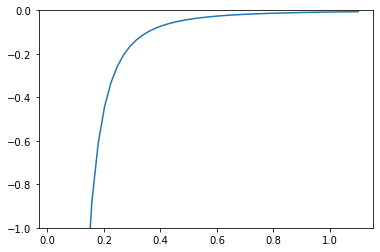

In [14]:
ys = linspace(0,1.1,50)
res = zeros(50)
for i, y in enumerate(ys):
    res[i]= pfn.normal_flow_residual(y, 0.0001, -1.43069, 1.)
figure()
plot(ys, res)
ylim(-1,0)

Node net fluxes =  [  1.22936383e-13   1.38227207e-13   1.52722279e-13   1.65751857e-13
   1.76854087e-13   1.84270377e-13   1.85655935e-13   1.74837922e-13]
Node head =  [ 10.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
  10.           0.39419266   0.37695369   0.3585211    0.33853012
   0.31641148   0.29119247   0.26095962   0.22084202   0.06340016
  10.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]
Discharge= [-0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05 -0.05]
D_H= [ 0.76630509  0.75426259  0.73980123  0.72199704  0.69927493  0.66857689
  0.62240133  0.43043965]


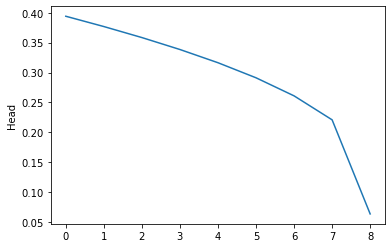

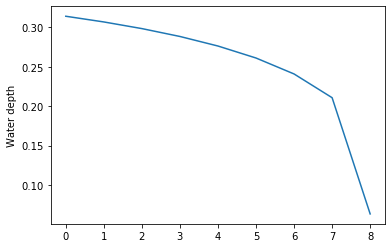

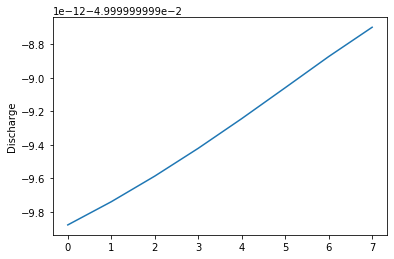

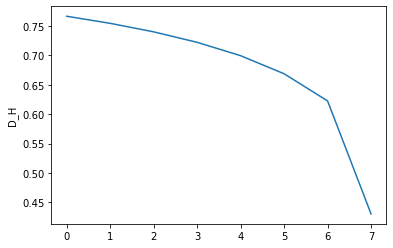

In [19]:
print("Node net fluxes = ",mg.calc_net_flux_at_node(Q)[mg.core_nodes]/mg.dx + mg.at_node['input__discharge'][mg.core_nodes])
print("Node head = ",mg.at_node['hydraulic__head'])

figure()
plot(mg.at_node['hydraulic__head'][11:20])
ylabel('Head')

figure()
water_depth = mg.at_node['hydraulic__head'][11:20] - mg.at_node['junction__elevation'][11:20]
water_depth[water_depth>1.] = 1.
plot(water_depth)
ylabel('Water depth')


figure()
plot(Q[mg.active_links])
ylabel('Discharge')

figure()
plot(mg.at_link['hydraulic__diameter'][mg.active_links])
ylabel('D_H')



print('Discharge=',Q[mg.active_links])
print('D_H=',mg.at_link['hydraulic__diameter'][mg.active_links])

Need to think about downstream bndy cond. It can produce some weird effects to have an artificially low fixed head boundary. 

For fully open channel solution iteration seems to get stuck with low dQ before head ever reaches appropriate range. 

In [9]:
print(mg.open_boundary_nodes)
print(mg.fixed_value_boundary_nodes)

[10 19 20 29 30 39]
[10 19 20 29 30 39]


In [36]:
heads_at_open_boundaries = mg.at_node['hydraulic__head'][mg.open_boundary_nodes]

mg.links_at_node[mg.open_boundary_nodes]
print(h)
upwind_links = mg.upwind_links_at_node(-Q)[mg.open_boundary_nodes]
#boundary_nodes_with_upwind_links = mg.open_boundary_nodes[upwind_links>0]
#upwind_links = upwind_links[upwind_links>0]
print(upwind_links)
#print(boundary_nodes_with_upwind_links)

for i, row in enumerate(upwind_links):
    print (row)
    bnd_node = mg.open_boundary_nodes[i]
    boundary_link = row[row>0]
    link_nodes = mg.nodes_at_link[boundary_link]
    upstream_node = link_nodes[link_nodes != bnd_node]
    equiv_upstream_flow_depth = mg.at_node['hydraulic__head'][upstream_node] - mg.at_node['junction__elevation'][upstream_node]
    mg.at_node['hydraulic__head'][bnd_node] = equiv_upstream_flow_depth

    #    if equiv_upstream_flow_depth>mg.at_link['maximum__depth'][boundary_link]:
        #If full pipe, set downstream head equal height above elevation
#        mg.at_node['hydraulic__head'][bnd_node] = equiv_upstream_flow_depth
    #Otherwise, solve for normal flow depth
        


[ 0.          0.          0.          0.          0.          4.2
  3.20179234  2.22153437  1.21065373  0.          4.2         3.20179761
  2.23520485  1.21146148  0.          4.2         3.20179234  2.22153437
  1.21065373  0.          0.          0.          0.          0.
  0.        ]
[[ 9 -1 -1]
 [-1 -1 -1]
 [18 -1 -1]
 [-1 -1 -1]
 [27 -1 -1]
 [-1 -1 -1]]
[ 9 -1 -1]
5
[-1 -1 -1]
9
[18 -1 -1]
10
[-1 -1 -1]
14
[27 -1 -1]
15
[-1 -1 -1]
19


array([ 9, -1, -1])

In [20]:
mg = RasterModelGrid((5,5),100)
junc_elev = mg.add_zeros('node', 'junction__elevation')
R = mg.add_zeros('node', 'input__discharge')
h = mg.add_zeros('node', 'hydraulic__head')
Q = mg.add_zeros('link', 'conduit__discharge')
mg.add_zeros('node','storage')
mg.at_node['storage']=10.*np.ones(mg.number_of_nodes)

mg.at_node['junction__elevation'] = -0.01*mg.node_x + 4.


w = mg.add_zeros('link','width')
mg.at_link['width']= 0.5*np.ones(mg.number_of_links)#.*np.random.rand(mg.number_of_active_links)

d_h = mg.add_zeros('link','hydraulic__diameter')
mg.at_link['hydraulic__diameter'] = w

mg.at_node['input__discharge'][12]=0.05

#Set up link elevation offsets
xc_min_head = mg.add_zeros('link', 'conduit_head__offset')
xc_min_tail = mg.add_zeros('link', 'conduit_tail__offset')
y_max = mg.add_zeros('link', 'maximum__depth')
mg.at_link['maximum__depth']= w#mg.at_link['hydraulic__diameter']#applicable for square conduits



#set heads at edges
h[mg.nodes_at_left_edge] = 4.2
h[mg.nodes_at_right_edge] = 0.
h[mg.nodes_at_top_edge] = 0.
h[mg.nodes_at_bottom_edge] = 0.

mg.set_closed_boundaries_at_grid_edges(False,True,False,True)
Q[mg.active_links] = 0.#0.1*np.random.rand(mg.number_of_active_links)
n_core = mg.number_of_core_nodes
links = mg.links_at_node
print("Number of links = ", mg.number_of_links)
print("Number of nodes = ", mg.number_of_nodes)
print("Number of active links = ", mg.number_of_active_links)
print("Number of core nodes = ", mg.number_of_core_nodes)


pfn = PresFlowNetwork(mg)


Number of links =  40
Number of nodes =  25
Number of active links =  18
Number of core nodes =  9


In [8]:
mg.calc_net_flux_at_node(Q)[mg.core_nodes]/mg.dx - mg.at_node['input__discharge'][mg.core_nodes]

array([  1.50350309e-01,   1.95539803e-09,   8.41032719e-02,
         1.50350310e-01,  -5.00000011e-02,   8.41032727e-02,
         1.50350309e-01,   1.95539803e-09,   8.41032719e-02])

In [21]:
for i in arange(500):
    print('Time iteration:', i)
    pfn.dyn_wave_solution(dt=5.)

Time iteration: 0
max change in h:  0.00624999846719
max change in h:  0.00312499998806
max change in h:  0.00156250035591
max change in h:  0.000781250332019
max change in h:  0.000390625209346
max change in h:  0.000195312607906
max change in h:  0.000675557188024
max change in h:  0.00305957032746
max change in h:  0.0105381863919
max change in h:  0.00725064368962
max change in h:  0.0041586203004
max change in h:  0.00222711783631
max change in h:  0.00115316599532
max change in h:  0.000586228797804
max change in h:  0.000294910608406
max change in h:  0.000147451708341
max change in h:  7.34562679073e-05
average dh= 0.0129024910041   average abs(dQ)= 0.0202490671414
Time iteration: 1
max change in h:  0.0183385479768
max change in h:  0.00936328553833
max change in h:  0.00471649483183
max change in h:  0.00235976505261
max change in h:  0.00117653968185
max change in h:  0.000585544663148
max change in h:  0.000291141915632
max change in h:  0.0001446891683
max change in h:  7.

max change in h:  0.00114275701644
max change in h:  0.000567247749253
max change in h:  0.000281553800715
max change in h:  0.000139744038729
max change in h:  6.93579033637e-05
average dh= 0.0277831768403   average abs(dQ)= 0.000363688020443
Time iteration: 21
max change in h:  0.0184983326994
max change in h:  0.00919559514918
max change in h:  0.00456769356744
max change in h:  0.00226793248017
max change in h:  0.00112579906238
max change in h:  0.000558772058395
max change in h:  0.000277317196227
max change in h:  0.000137626259291
max change in h:  6.82992629502e-05
average dh= 0.0274201741593   average abs(dQ)= 0.000363688026154
Time iteration: 22
max change in h:  0.0182260564411
max change in h:  0.00905961690631
max change in h:  0.00449977504786
max change in h:  0.00223400000523
max change in h:  0.00110884240104
max change in h:  0.000550297149648
max change in h:  0.000273081035665
max change in h:  0.000135508722703
max change in h:  6.72407526761e-05
average dh= 0.027

max change in h:  0.000127836981795
max change in h:  6.55436226999e-05
average dh= 0.019511763073   average abs(dQ)= 0.00402426878871
Time iteration: 44
max change in h:  0.0124744092639
max change in h:  0.00665698927516
max change in h:  0.00353972587685
max change in h:  0.00186753077877
max change in h:  0.000976142608598
max change in h:  0.000505471630082
max change in h:  0.000259508064442
max change in h:  0.000132240058352
max change in h:  6.69678416965e-05
average dh= 0.0192652219069   average abs(dQ)= 0.00339019094257
Time iteration: 45
max change in h:  0.0144787256196
max change in h:  0.0075188680498
max change in h:  0.00389391161919
max change in h:  0.00200652575673
max change in h:  0.00102795445341
max change in h:  0.000523587370316
max change in h:  0.000265282899267
max change in h:  0.000133797638694
max change in h:  6.72280338014e-05
average dh= 0.019083036097   average abs(dQ)= 0.00240031909813
Time iteration: 46
max change in h:  0.0158742108638
max change 

max change in h:  0.000515149223876
max change in h:  0.000256726617614
max change in h:  0.000127949445962
max change in h:  6.37730645798e-05
average dh= 0.0185969337162   average abs(dQ)= 0.000195475751501
Time iteration: 69
max change in h:  0.016626187639
max change in h:  0.00828873513056
max change in h:  0.00413028117283
max change in h:  0.00205762779609
max change in h:  0.00102499126866
max change in h:  0.00051060382037
max change in h:  0.000254379625919
max change in h:  0.000126742954711
max change in h:  6.31549865293e-05
average dh= 0.0185866487918   average abs(dQ)= 0.000219333657171
Time iteration: 70
max change in h:  0.0164961775678
max change in h:  0.00822119816445
max change in h:  0.00409509904709
max change in h:  0.00203930521251
max change in h:  0.00101546926291
max change in h:  0.000505670311484
max change in h:  0.000251831795962
max change in h:  0.000125431182755
max change in h:  6.24813786725e-05
average dh= 0.0185759373666   average abs(dQ)= 0.00024

max change in h:  0.00411741938194
max change in h:  0.00204445119633
max change in h:  0.00101467830705
max change in h:  0.00050356701972
max change in h:  0.000249965160503
max change in h:  0.000124124883591
max change in h:  6.16621061521e-05
average dh= 0.0155927524962   average abs(dQ)= 0.000223921718299
Time iteration: 95
max change in h:  0.0165154468922
max change in h:  0.00821152788463
max change in h:  0.0040771305098
max change in h:  0.00202276759361
max change in h:  0.00100323151094
max change in h:  0.000497581994834
max change in h:  0.000246847558265
max change in h:  0.000122501932358
max change in h:  6.08167441827e-05
average dh= 0.0155048337475   average abs(dQ)= 0.000262361185975
Time iteration: 96
max change in h:  0.0162958651115
max change in h:  0.00809749598732
max change in h:  0.00401880139825
max change in h:  0.00199307009832
max change in h:  0.000988079840472
max change in h:  0.00048980669829
max change in h:  0.000242829529484
max change in h:  0.0

max change in h:  5.18868600974e-07
average dh= 5.22771629656e-09   average abs(dQ)= 1.36113815666e-06
Time iteration: 150
max change in h:  1.81997778848e-07
average dh= 5.41415793367e-09   average abs(dQ)= 1.03010062423e-06
Time iteration: 151
max change in h:  1.98694293685e-07
average dh= 5.18237330597e-09   average abs(dQ)= 6.97915387604e-07
Time iteration: 152
max change in h:  6.21893939901e-07
average dh= 4.65942713162e-09   average abs(dQ)= 3.8792646704e-07
Time iteration: 153
max change in h:  9.12159153321e-07
average dh= 3.95214363686e-09   average abs(dQ)= 3.69857936587e-07
Time iteration: 154
max change in h:  1.07783776282e-06
average dh= 3.14896521972e-09   average abs(dQ)= 4.7823822375e-07
Time iteration: 155
max change in h:  1.13398737822e-06
average dh= 2.32172574287e-09   average abs(dQ)= 5.39726362718e-07
Time iteration: 156
max change in h:  1.09994582864e-06
average dh= 1.52710770345e-09   average abs(dQ)= 5.50583620189e-07
Time iteration: 157
max change in h:  

max change in h:  3.42510464435e-11
average dh= -1.72743980578e-13   average abs(dQ)= 4.61250603292e-11
Time iteration: 236
max change in h:  1.06814557199e-11
average dh= -1.78537966625e-13   average abs(dQ)= 3.43838696408e-11
Time iteration: 237
max change in h:  4.1795455985e-12
average dh= -1.70455707805e-13   average abs(dQ)= 2.27051192141e-11
Time iteration: 238
max change in h:  1.14801501638e-11
average dh= -1.5202444049e-13   average abs(dQ)= 1.2587245473e-11
Time iteration: 239
max change in h:  1.64157576421e-11
average dh= -1.2674897108e-13   average abs(dQ)= 1.34352759826e-11
Time iteration: 240
max change in h:  1.91398008553e-11
average dh= -9.78689419244e-14   average abs(dQ)= 1.72925103749e-11
Time iteration: 241
max change in h:  1.99298355597e-11
average dh= -6.81959195904e-14   average abs(dQ)= 1.91530201258e-11
Time iteration: 242
max change in h:  1.91409110784e-11
average dh= -4.00032167885e-14   average abs(dQ)= 1.92620882051e-11
Time iteration: 243
max change i

max change in h:  8.881784197e-16
average dh= 4.19976553534e-17   average abs(dQ)= 5.53468644854e-16
Time iteration: 331
max change in h:  6.66133814775e-16
average dh= 3.20239591018e-17   average abs(dQ)= 4.96410999691e-16
Time iteration: 332
max change in h:  4.4408920985e-16
average dh= 2.2505145895e-17   average abs(dQ)= 3.88037463369e-16
Time iteration: 333
max change in h:  2.22044604925e-16
average dh= 1.55469772858e-17   average abs(dQ)= 3.21560811832e-16
Time iteration: 334
max change in h:  0.0
average dh= 8.14067177865e-18   average abs(dQ)= 2.24337993687e-16
Time iteration: 335
max change in h:  2.22044604925e-16
average dh= -9.55061647052e-19   average abs(dQ)= 1.45067756515e-16
Time iteration: 336
max change in h:  2.22044604925e-16
average dh= -1.03823200037e-17   average abs(dQ)= 8.98698192446e-17
Time iteration: 337
max change in h:  0.0
average dh= -2.48585874107e-17   average abs(dQ)= 1.19278803173e-16
Time iteration: 338
max change in h:  0.0
average dh= -3.92741394

max change in h:  0.0
average dh= -3.89850189168e-17   average abs(dQ)= 9.42352388252e-18
Time iteration: 421
max change in h:  0.0
average dh= -3.93049790246e-17   average abs(dQ)= 9.39641882821e-18
Time iteration: 422
max change in h:  0.0
average dh= -3.91459627059e-17   average abs(dQ)= 9.39039548281e-18
Time iteration: 423
max change in h:  0.0
average dh= -3.90023661515e-17   average abs(dQ)= 9.3843721374e-18
Time iteration: 424
max change in h:  0.0
average dh= -3.88587695971e-17   average abs(dQ)= 9.37985462835e-18
Time iteration: 425
max change in h:  0.0
average dh= -3.86987895432e-17   average abs(dQ)= 9.3753371193e-18
Time iteration: 426
max change in h:  0.0
average dh= -3.90486254442e-17   average abs(dQ)= 9.3693137739e-18
Time iteration: 427
max change in h:  0.0
average dh= -3.93994250805e-17   average abs(dQ)= 9.36630210119e-18
Time iteration: 428
max change in h:  0.0
average dh= -3.92558285261e-17   average abs(dQ)= 9.31058615622e-18
Time iteration: 429
max change in

In [10]:
#h_new_solver = h.copy()
#Q_new_solver = Q.copy()
#h[mg.core_nodes]
#mg.at_link['hydraulic__diameter']
mg.at_node['junction__elevation']

array([ 4.,  3.,  2.,  1.,  0.,  4.,  3.,  2.,  1.,  0.,  4.,  3.,  2.,
        1.,  0.,  4.,  3.,  2.,  1.,  0.,  4.,  3.,  2.,  1.,  0.])

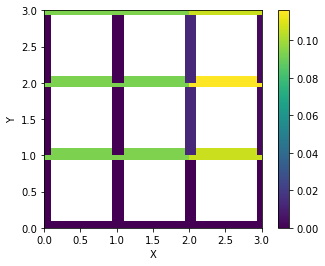

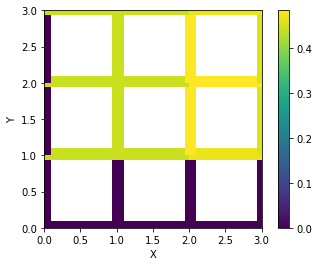

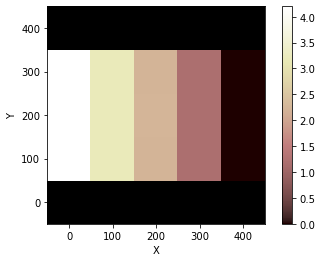

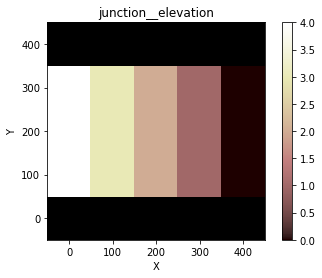

In [15]:
figure()
plot_links(mg, 'conduit__discharge',magnitude=True)
figure()
plot_links(mg, 'hydraulic__diameter')
figure()
imshow_grid_at_node(mg, h)
figure()
imshow_grid_at_node(mg, 'junction__elevation')


In [9]:
FUDGE=0.0001
active_links = mg.active_links
head_nodes = mg.node_at_link_head[active_links]
tail_nodes = mg.node_at_link_tail[active_links]
h_head = mg.at_node['hydraulic__head'][head_nodes]
h_tail = mg.at_node['hydraulic__head'][tail_nodes]
#Calculate flow depths using offset and junction elevations
y_head = h_head - mg.at_node['junction__elevation'][head_nodes] \
         - mg.at_link['conduit_head__offset'][active_links]
y_tail = h_tail - mg.at_node['junction__elevation'][tail_nodes] \
          - mg.at_link['conduit_tail__offset'][active_links]
y_head[y_head>mg.at_link['maximum__depth'][active_links]] = mg.at_link['maximum__depth'][active_links][y_head>mg.at_link['maximum__depth'][active_links]]
y_tail[y_tail>mg.at_link['maximum__depth'][active_links]] = mg.at_link['maximum__depth'][active_links][y_tail>mg.at_link['maximum__depth'][active_links]]
y_avg = 0.5*(y_head + y_tail)
A_avg = mg.at_link['width'][active_links] * y_avg
y_avg[y_avg<FUDGE] = FUDGE
A_avg[A_avg<FUDGE] = FUDGE

In [10]:
h_head>h_tail

array([False, False, False, False, False, False, False, False, False], dtype=bool)

In [22]:
#y_tail[y_tail>mg.at_link['maximum__depth'][active_links]] = 
#mg.at_link['maximum__depth'][active_links][y_tail>mg.at_link['maximum__depth'][active_links]]
d_h_square(mg.at_link['width'][active_links], y_avg)

array([  3.96936126e-01,   3.53636005e-04,   3.99594057e-04,
         3.99687423e-04,   3.99814040e-04,   3.99715864e-04,
         3.99694894e-04,   4.90132384e-01,   3.99793756e-04,
         3.96927434e-04,   3.99777355e-04,   3.99802869e-04,
         3.99787176e-04,   3.97200621e-04,   2.81319838e-01,
         3.99646193e-04,   3.99446218e-04,   3.99054260e-04])

In [21]:
def d_h_square(width, flow_depth):
    d_H = np.zeros(np.size(width))
    is_full_pipe = np.isclose(width,flow_depth)
    d_H[is_full_pipe] = width[is_full_pipe]
    d_H[~is_full_pipe] = 4.*width[~is_full_pipe]*flow_depth[~is_full_pipe] / (2.*flow_depth[~is_full_pipe] + width[~is_full_pipe])
    return d_H

In [17]:
mg.at_link['hydraulic__diameter'][mg.active_links]

array([ 0.75,  0.75,  0.75,  0.5 ,  0.75,  0.75,  0.75,  0.75,  0.75,
        0.75,  0.5 ,  0.75,  0.75,  0.75,  0.75,  0.75,  0.75,  0.5 ])

In [11]:
pfn.run_one_step()

Number of iterations = 1 tolerance = nan  iteration time= 0.016219377517700195


/home/mcoving/Data/github/landlab/landlab/components/conduit_networks/pressurized_flow.py:186: RuntimeWarning: divide by zero encountered in true_divide
  self.r = 8*f*L/(g*r_s**2.*d_h**5.)
/home/mcoving/Data/github/landlab/landlab/components/conduit_networks/pressurized_flow.py:267: RuntimeWarning: divide by zero encountered in double_scalars
  ADA_ij[i][j] = -1./(a[this_link]*r[this_link]*np.fabs(self.Q[this_link])**(a[this_link]-1))
/home/mcoving/anaconda3/envs/landlab_dev/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:198: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
/home/mcoving/Data/github/landlab/landlab/components/conduit_networks/pressurized_flow.py:277: RuntimeWarning: divide by zero encountered in true_divide
  dQ= -(1./a[self.grid.active_links])*self.Q[self.grid.active_links] - 1./(a[self.grid.active_links]*r[self.grid.active_links]*np.fabs(self.Q[self.grid.active_links])**(a[self.grid.active_link

In [5]:
d_h.copy()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [54]:
mg.at_node['junction__elevation']

array([ 4.,  3.,  2.,  1.,  0.,  4.,  3.,  2.,  1.,  0.,  4.,  3.,  2.,
        1.,  0.,  4.,  3.,  2.,  1.,  0.,  4.,  3.,  2.,  1.,  0.])